In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding='latin1')

# Drop columns with more than 50% missing values
threshold = len(data) * 0.5
data_dropped = data.dropna(thresh=threshold, axis=1)

# Drop rows with missing values in non-numeric columns that are essential
data_dropped = data_dropped.dropna(subset=['Artist', 'Spotify Streams'])

# Remove commas from the 'Spotify Streams' column and convert to numeric
data_dropped['Spotify Streams'] = data_dropped['Spotify Streams'].str.replace(',', '').astype(float)

# Separate numeric and non-numeric columns
numeric_cols = data_dropped.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = data_dropped.select_dtypes(exclude=['float64', 'int64']).columns

# Impute missing values for numeric columns
imputer = SimpleImputer(strategy='mean')
data_dropped[numeric_cols] = imputer.fit_transform(data_dropped[numeric_cols])

# Convert categorical columns to numerical (if any)
data_dropped['Explicit Track'] = data_dropped['Explicit Track'].astype(int)

# Select relevant features (excluding non-numeric columns like 'Track', 'Album Name', 'Artist', etc.)
features = data_dropped.drop(columns=['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC', 'Spotify Streams'])
target = data_dropped['Spotify Streams']

# One-hot encode categorical columns if any remain in features
categorical_cols = features.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = pd.DataFrame(encoder.fit_transform(features[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
features = features.drop(columns=categorical_cols)
features = pd.concat([features.reset_index(drop=True), encoded_cats.reset_index(drop=True)], axis=1)

# Ensure target is in sync with features after any row-dropping
features, target = features.align(target, join='inner', axis=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Linear Regression MSE: {mse}')
print(f'Linear Regression R^2: {r2}')


Linear Regression MSE: 2.852708893780742e+17
Linear Regression R^2: 0.014343372573294988


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Example: Predicting if a track is explicit
target_logistic = data_dropped['Explicit Track']
features_logistic, target_logistic = features.align(target_logistic, join='inner', axis=0)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(features_logistic, target_logistic, test_size=0.2, random_state=42)
X_train_log_scaled = scaler.fit_transform(X_train_log)
X_test_log_scaled = scaler.transform(X_test_log)

# Logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_log_scaled, y_train_log)
y_pred_log = log_reg.predict(X_test_log_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test_log, y_pred_log)
precision = precision_score(y_test_log, y_pred_log)
recall = recall_score(y_test_log, y_pred_log)
roc_auc = roc_auc_score(y_test_log, y_pred_log)
print(f'Logistic Regression Accuracy: {accuracy}')
print(f'Logistic Regression Precision: {precision}')
print(f'Logistic Regression Recall: {recall}')
print(f'Logistic Regression ROC AUC: {roc_auc}')



Logistic Regression Accuracy: 0.6301369863013698
Logistic Regression Precision: 0.16666666666666666
Logistic Regression Recall: 0.003125
Logistic Regression ROC AUC: 0.4970660971223022


In [17]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# SVM model
svm = SVC(kernel='linear')
svm.fit(X_train_log_scaled, y_train_log)
y_pred_svm = svm.predict(X_test_log_scaled)

# Evaluate the model
print(classification_report(y_test_log, y_pred_svm))


              precision    recall  f1-score   support

           0       0.63      0.99      0.77       556
           1       0.11      0.00      0.01       320

    accuracy                           0.63       876
   macro avg       0.37      0.49      0.39       876
weighted avg       0.44      0.63      0.49       876



In [18]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
tree = DecisionTreeClassifier()
tree.fit(X_train_log_scaled, y_train_log)
y_pred_tree = tree.predict(X_test_log_scaled)

# Evaluate the model
print(classification_report(y_test_log, y_pred_tree))


              precision    recall  f1-score   support

           0       0.65      0.71      0.68       556
           1       0.40      0.33      0.36       320

    accuracy                           0.57       876
   macro avg       0.52      0.52      0.52       876
weighted avg       0.56      0.57      0.56       876



In [19]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
forest = RandomForestClassifier()
forest.fit(X_train_log_scaled, y_train_log)
y_pred_forest = forest.predict(X_test_log_scaled)

# Evaluate the model
print(classification_report(y_test_log, y_pred_forest))


              precision    recall  f1-score   support

           0       0.63      0.99      0.77       556
           1       0.33      0.01      0.02       320

    accuracy                           0.63       876
   macro avg       0.48      0.50      0.40       876
weighted avg       0.52      0.63      0.50       876



In [20]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_log_scaled, y_train_log)
y_pred_nb = nb.predict(X_test_log_scaled)

# Evaluate the model
print(classification_report(y_test_log, y_pred_nb))


              precision    recall  f1-score   support

           0       0.60      0.22      0.32       556
           1       0.35      0.74      0.48       320

    accuracy                           0.41       876
   macro avg       0.48      0.48      0.40       876
weighted avg       0.51      0.41      0.38       876



In [21]:
from sklearn.neighbors import KNeighborsClassifier

# KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_log_scaled, y_train_log)
y_pred_knn = knn.predict(X_test_log_scaled)

# Evaluate the model
print(classification_report(y_test_log, y_pred_knn))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       556
           1       0.37      1.00      0.54       320

    accuracy                           0.37       876
   macro avg       0.18      0.50      0.27       876
weighted avg       0.13      0.37      0.20       876



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\kunji\AppData\Local\Temp\ipykernel_3036\2154494690.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_dropped.corr(), annot=True, fmt='.2f')


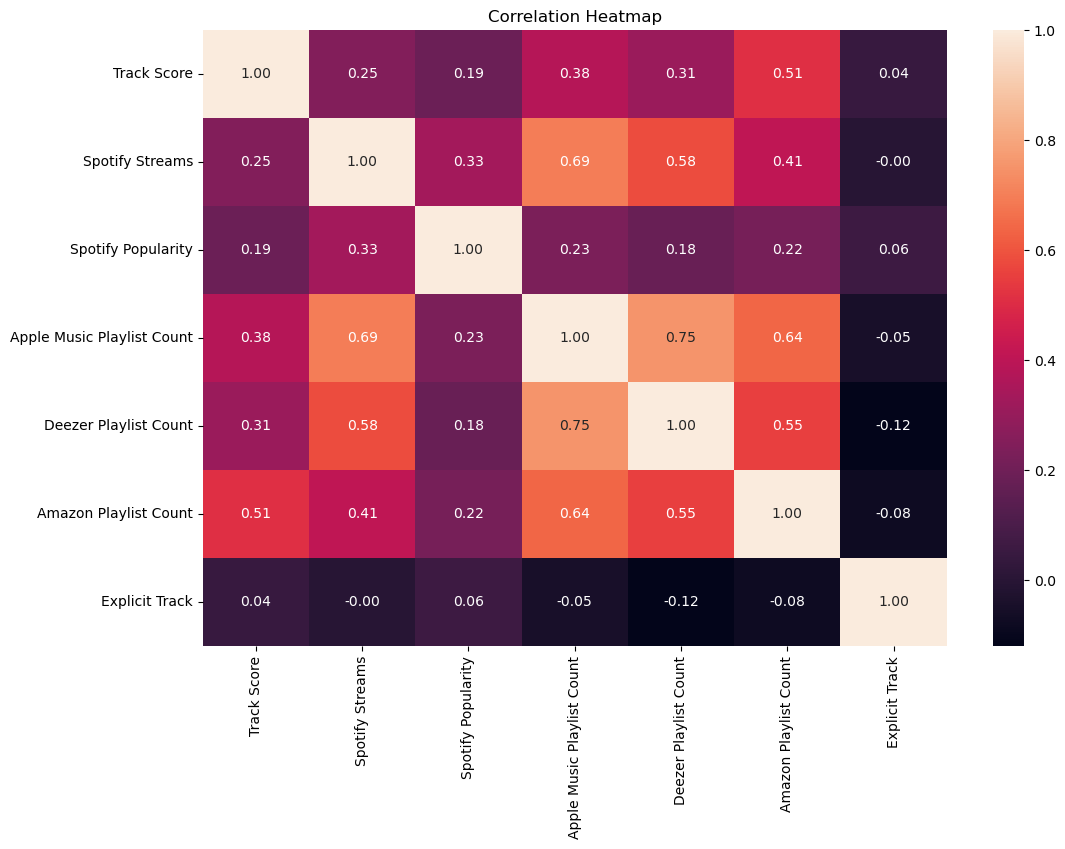

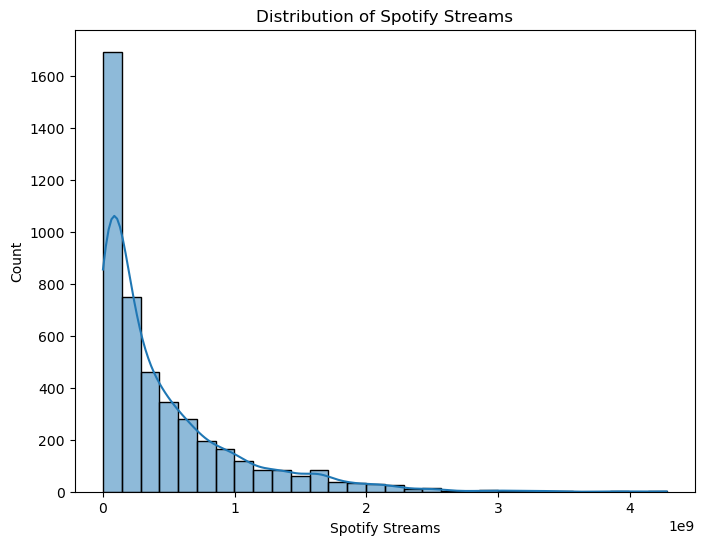

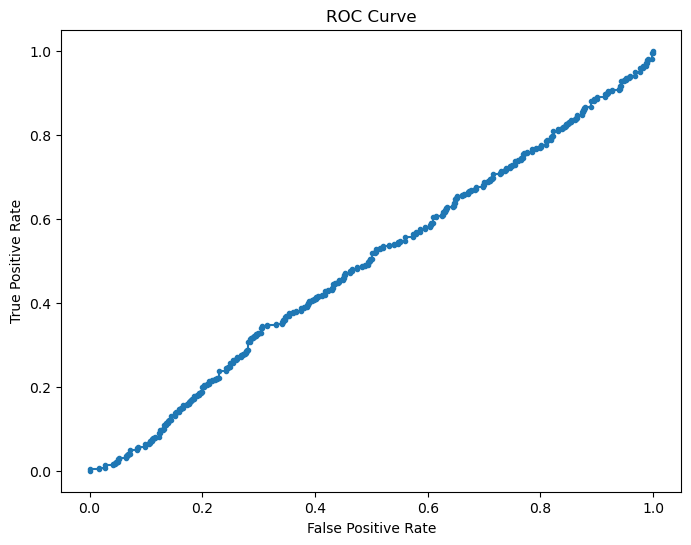

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_dropped.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of a feature (e.g., Spotify Streams)
plt.figure(figsize=(8, 6))
sns.histplot(data_dropped['Spotify Streams'], bins=30, kde=True)
plt.title('Distribution of Spotify Streams')
plt.show()

# Model performance visualization (ROC curve example)
from sklearn.metrics import roc_curve

y_pred_prob = log_reg.predict_proba(X_test_log_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_log, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
